# Project 8: Machine Learning for Predictive Analytics

The project relates to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:
-	High churn rate amongst customers leading to a revenue decline of ~500k USD every month
-	Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share


Aim: 
1.	Build a classification model to predict churners one month in advance
2.	Identify key churn drivers


## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [ ]:
#edit the file location of raw data set
from google.colab import files
uploaded = files.upload()

Saving Telecom Data.csv to Telecom Data (1).csv


In [ ]:
#edit the file location of raw data set
import io
cust_df = pd.read_csv(io.BytesIO(uploaded['Telecom Data.csv'])) 
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [ ]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape


(51047, 58)

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [ ]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df.MonthlyRevenue==0].shape[0]

cust_df= cust_df[cust_df.MonthlyRevenue > 0.0]

cust_df= cust_df[cust_df["MonthlyMinutes"] > 0.0]


6

### Q1.2 How many columns has missing values percentage > 5%

In [ ]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
100*(cust_df.isnull().sum()/cust_df.shape[0])
#What strategy should be used for imputation?

#since count of missing value is small we can just drop them
cust_df.dropna(axis=0, inplace=True)
cust_df.shape[0]

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

49078

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)

Since the percentage of missing number is small, we can just drop those rows

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

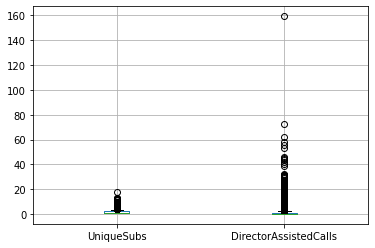

In [ ]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


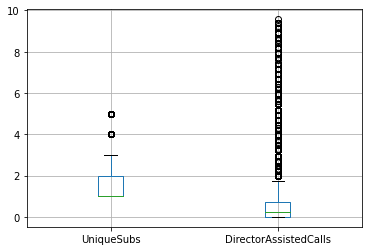

In [ ]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

q_value= [i/100 for i in range(95,101,1)]
cust_df[cols].quantile(q_value)

#filtering cust data with 99% value
cust_df= cust_df[(cust_df.UniqueSubs <=5) & (cust_df.DirectorAssistedCalls <=9.6156)]
cols= ["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

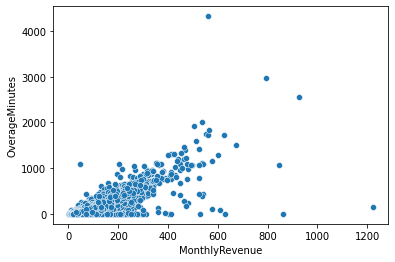

In [ ]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

Text(0.5, 1.0, 'Non churned customer')

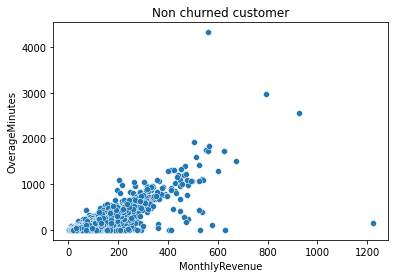

Text(0.5, 1.0, 'Churned customer')

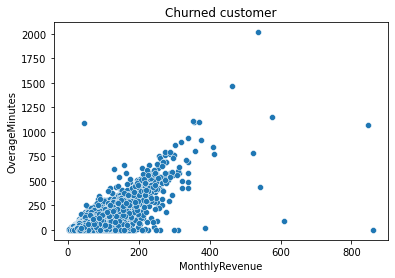

In [ ]:
plt.title("Non churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

plt.title("Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

There seems to be strong corelation between monthly revenue and overage minutes

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

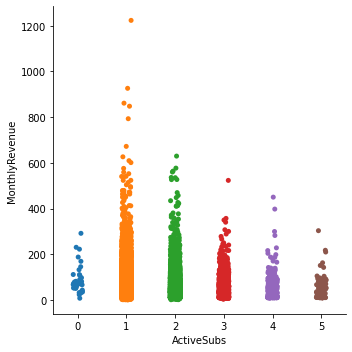

In [ ]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", data=cust_df) 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis

It looks like with increase in number of category plot, the monthly revenue decreases.

### Q2.3 Does credit rating have an impact in churn rate?

In [ ]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<mark>__Result:__
    
Type your interpretation here based on the analysis above

People irrespective of their credit rating customer are churning and proportion of churned customer is higher on larger credit scores.

### Placeholder for additional exploratory analysis

In [ ]:
#type your code here for any additional exploratory analysis (if any)

## Q3. Create additional features to help predict churn

In [ ]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']= cust_df['OverageMinutes'] / cust_df['MonthlyMinutes']

    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    cust_df['perc_Roaming_Calls']= cust_df['RoamingCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Dropped_Calls']= cust_df['DroppedCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Blocked_Calls']= cust_df['BlockedCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Unanswered_Calls']= cust_df['UnansweredCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Customer_Care_Calls']= cust_df['CustomerCareCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Threeway_Calls']= cust_df['ThreewayCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Received_Calls']= cust_df['ReceivedCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Outbound_Calls']= cust_df['OutboundCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_Inbound_Calls']= cust_df['InboundCalls'] / cust_df['MonthlyMinutes']

    cust_df['perc_PeakCalls_InOut']= cust_df['PeakCallsInOut'] / cust_df['MonthlyMinutes']

    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df['MonthlyMinutes']
    
    return cust_df  

In [ ]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)


In [ ]:
#A function that helps to seperate the column whether they are categorical or continous variable
def check_categorical(cust_df):
  colnames= cust_df.columns
  categorical_col = []
  continous_col= []

  for i in colnames:
    if cust_df[i].nunique() < 20:
      if i != "Churn":
        categorical_col.append(i)

    else:
      if i not in ["CustomerID", "ServiceArea"]:
        continous_col.append(i)

  return (categorical_col,continous_col)

In [ ]:
#Function that does chisqr test to validate whether categorical variable is independent of the churn rate or not
#filtersout whether categorical variables that has impact on churn.

def check_categorical_imp(cust_df, categorical_col):
  new_categorical_col=[]
  for i in categorical_col:
    if stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
      pass
    else:
      new_categorical_col

  return new_categorical_col


In [ ]:
categorical_col, continous_col= check_categorical(cust_df)

In [ ]:
cust_df.shape

(48374, 72)

In [ ]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

In [ ]:
cust_df["Churn"]= cust_df["Churn"].replace(["Yes", "No"], [1,0])
class_count_0, class_count_1 = cust_df["Churn"].value_counts()

class_0= cust_df[cust_df['Churn'] == 0]
class_1= cust_df[cust_df["Churn"] == 1] #prints the shape of the class

class_1_over=  class_1.sample(class_count_0, replace=True)

test_over= pd.concat([class_1_over, class_0], axis=0)

cust_df= test_over
y=cust_df.Churn
y.value_counts()/len(y)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

In [ ]:
#filters categorical and continous column names

#passes all categorical variable and returns only those that have impact on churn
important_categorical_col=  check_categorical_imp(cust_df, categorical_col)

#storing the churn flag variable in y
y=cust_df.Churn
customerid= cust_df.CustomerID
monthlyrevenue = cust_df.MonthlyRevenue

#keeping on the relevant columns from the data
cust_df=  cust_df[important_categorical_col + continous_col]

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [ ]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#scaling all continous variables from the dataframe
cust_df[continous_col] = sc.fit_transform(cust_df[continous_col])

#Create dummy variables for all categorical variables
cust_df = pd.get_dummies(cust_df, columns= important_categorical_col, drop_first= True)

#X = pd.get_dummies(X)



In [ ]:
y.value_counts()

1    34730
0    34730
Name: Churn, dtype: int64

In [ ]:
y.value_counts()/ len(y)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

In [ ]:
len(important_categorical_col)

0

In [ ]:
cust_df["CustomerID"] = customerid
X=cust_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
y_train.value_counts()

1    24462
0    24160
Name: Churn, dtype: int64

In [ ]:
train_custid= X_train.CustomerID
test_custid= X_test.CustomerID
X_train.drop(["CustomerID"], inplace=True, axis=1)
X_test.drop(["CustomerID"], inplace=True, axis=1)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, plot_confusion_matrix, average_precision_score

logistic_classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
logistic_predt_train_output= logistic_classifier.predict_proba(X_train)[:,1]

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
logistic_predt_test_output = logistic_classifier.predict_proba(X_test)[:,1]


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

In [ ]:
import copy
from copy import deepcopy

def efficient_cutoff(actual_value, predicted):
  probability_cutoff = []
  f1_score_value= []

  for i in range(0,101):
    predicted_x= deepcopy(predicted)
    predicted_x[predicted_x >=i /100] =1
    predicted_x[predicted_x <i /100] =0
    probability_cutoff.append(i/100)
    f1_score_value.append(f1_score(actual_value, predicted_x))

  return (probability_cutoff, f1_score_value)

Text(0.5, 0, 'probability cutoff train value')

Text(0, 0.5, 'f1_score train')

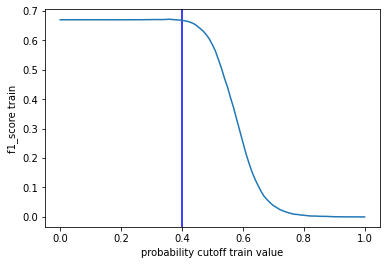

Text(0.5, 0, 'probability cutoff test value')

Text(0, 0.5, 'f1_score test')

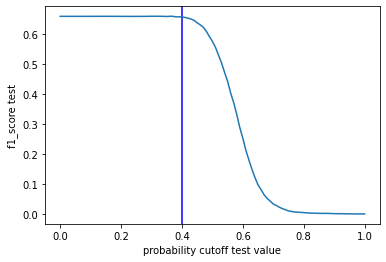

In [ ]:
probability_cutoff, f1_score_value = efficient_cutoff(y_train, logistic_predt_train_output)

plt.xlabel("probability cutoff train value")
plt.axvline(x=0.4, color='b', label='axvline - full height')
plt.ylabel("f1_score train")
plt.plot(probability_cutoff, f1_score_value)
plt.show()

probability_cutoff, f1_score_value = efficient_cutoff(y_test, logistic_predt_test_output)

plt.xlabel("probability cutoff test value")
plt.axvline(x=0.4, color='b', label='axvline - full height')
plt.ylabel("f1_score test")
plt.plot(probability_cutoff, f1_score_value)
plt.show()

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(max_depth= 15, min_samples_split=50, random_state=40, criterion = "entropy", n_estimators= 350, n_jobs=-1)
clf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=-1, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

Text(0.5, 0, 'probability cutoff value train')

Text(0, 0.5, 'f1_score train')

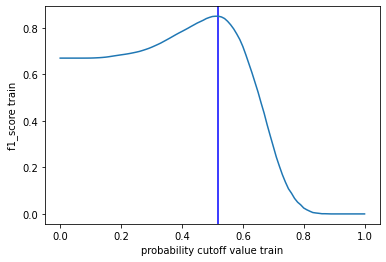

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
rf_train_output= clf.predict_proba(X_train)[:,1]
rf_test_output= clf.predict_proba(X_test)[:,1]


#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#plotting the f1-score vs the probability cutoff score
probability_cutoff, f1_score_value = efficient_cutoff(y_train, rf_train_output)

plt.axvline(x=0.52, color='b', label = 'axvline - full height')
plt.xlabel("probability cutoff value train")
plt.ylabel("f1_score train")
plt.plot(probability_cutoff, f1_score_value)
plt.show()
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix



<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?


the random forest has better predicitve capability. we have selected cutoff value in order to maximize f1 score

### Q4.3 Identify most important features impacting churn

In [ ]:
W24t43 45678-

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature importance plot')

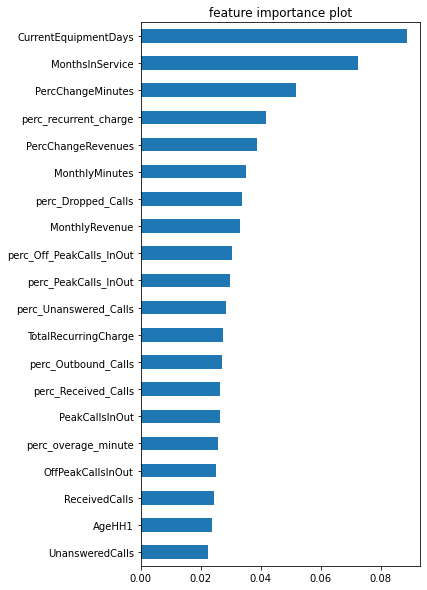

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_importances= pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("feature importance plot")
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',)

## Q5. [Bonus Question] Use the hold out data provided to predict churners using the best model identified in step 4 

In [ ]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object



## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [ ]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)






<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   